In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [3]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

# Exploratory Climate Analysis

In [4]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date

annual_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

prcp = pd.DataFrame(annual_prcp)
prcp.dropna(axis=0, how='any', inplace=True)
prcp.set_index('date', inplace = True)
prcp.columns = ['precipitation']

prcp.head()


,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


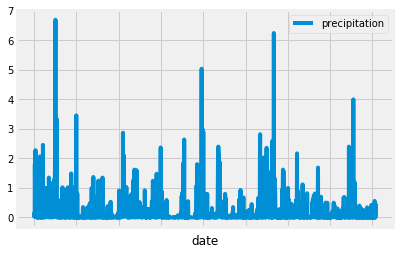

In [5]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp.plot()
plt.xlabel('date')
plt.show()

In [6]:
#hold for image

![precipitation](Images/precipitation.png)

In [7]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp['precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

In [ ]:
#hold for image

![describe](Images/describe.png)

In [8]:
# Design a query to show how many stations are available in this dataset?
station = session.query(Station).count()
print(f"There are {station} stations")

There are 9 stations


In [9]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [10]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

most_active = active_stations[0][0]

low = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active).all()
high = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active).all()
avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active).all()

print (f'The lowest temperature was {low}')
print (f'The highest temperature was {high}')
print (f'The average temperature was {avg}')

The lowest temperature was [(54.0,)]
The highest temperature was [(85.0,)]
The average temperature was [(71.66378066378067,)]


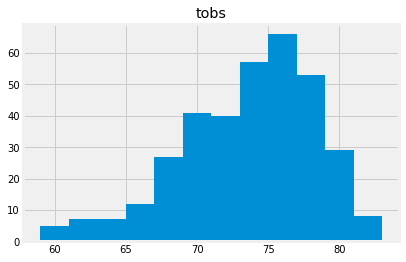

In [11]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_temps = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.date >= query_date).\
    filter(Measurement.station == most_active).all()

active_temps = pd.DataFrame(station_temps)
active_temps = active_temps.drop('station', axis=1)

active_temps

active_temps.hist(bins=12)
plt.ylabel=('Frequency')
# plt.tight_layout()

plt.show(block=False)
plt.pause(3)
plt.close()



In [ ]:
#hold for image

![precipitation](Images/station-histogram.png)